# Assignment: Rlab 1 File

### Exercise 1 - American Airlines Employees

1) Read the data and import them in a dataframe

In [26]:
#install.packages("tidyverse")
library('tidyverse')

#hiding warning
options(warn=-1)
options(messages=-1)

suppressMessages({
    suppressWarnings({
        
cnames = c("Month","Year","Full.time", "Part.time","Total")
AA <-  read_table(file = 'american_airline_empl.txt', skip = 1, col_names = cnames)
DA <- read_table(file = 'delta_airline_empl.txt', skip = 1, col_names = cnames)
FE <-  read_table(file = 'federal_express_empl.txt', skip = 1, col_names = cnames)
UA <- read_table(file = 'united_airline_empl.txt', skip = 1, col_names = cnames)

companies = c("American", "Delta", "Federal", "United")
AA$Company <- companies[1]
DA$Company <- companies[2]
FE$Company <- companies[3]
UA$Company <- companies[4]

    })
})

2) Merge the four data tibble in a common one

In [2]:
data <- rbind(AA,DA,FE,UA)

# combine year and month columns into a single string assuming they got the job on the first day of the month
data$Date <- paste(data$Year, data$Month, "01", sep = "-")
data$Date <- as.Date(data$Date)
data[1:10,]


Month,Year,Full.time,Part.time,Total,Company,Date
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<date>
1,1990,68137,9039,77176,American,1990-01-01
2,1990,68725,9273,77998,American,1990-02-01
3,1990,69509,9376,78885,American,1990-03-01
4,1990,69713,9326,79039,American,1990-04-01
5,1990,70376,9309,79685,American,1990-05-01
6,1990,71258,9369,80627,American,1990-06-01
7,1990,72018,9651,81669,American,1990-07-01
8,1990,72513,9694,82207,American,1990-08-01
9,1990,72776,9788,82564,American,1990-09-01


3) Plot of the behaviour of the employees as a function of time for all four companies,


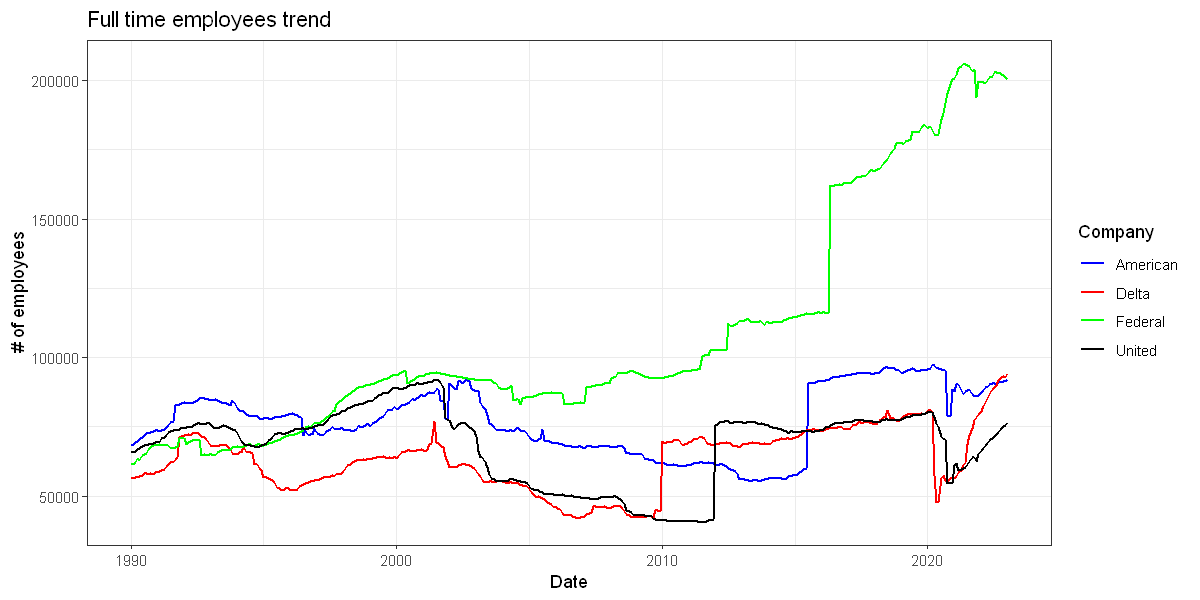

In [3]:
library(ggplot2)
theme_set(theme_bw())
colorlist1 = c("blue", "red", "green", "black")

options(repr.plot.width=10, repr.plot.height=5)
ft <- ggplot(data, aes(x = Date, y = Full.time, color = Company)) +
            geom_line(linewidth = 0.7) +
            labs(title="Full time employees trend", x = "Date", y="# of employees") +
            scale_color_manual(values=colorlist1, label=companies)
ft

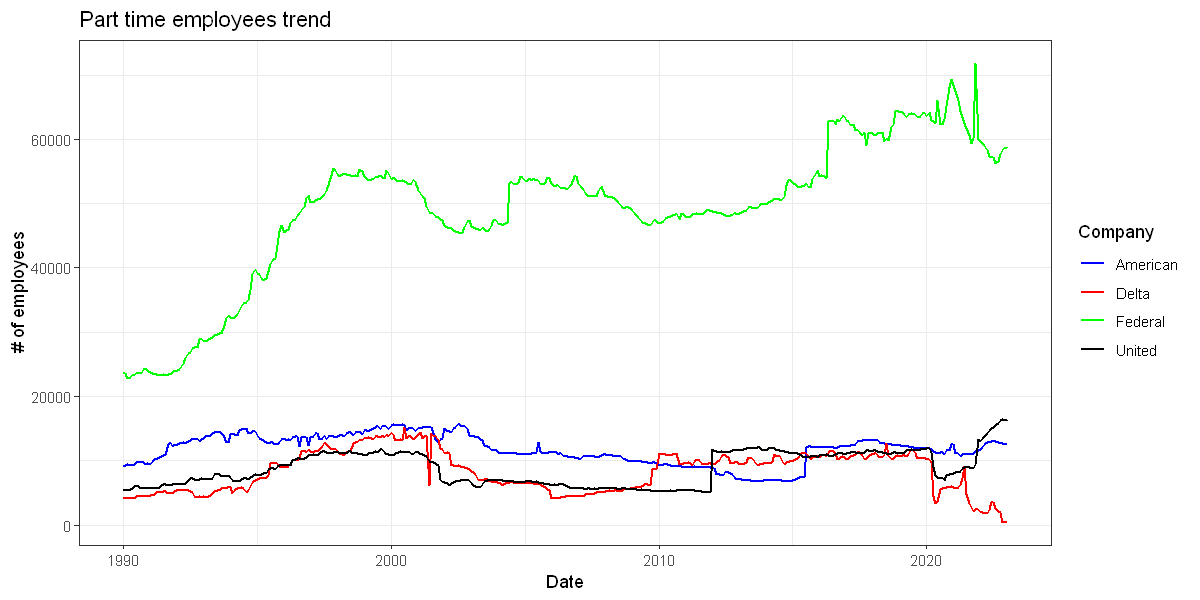

In [4]:
options(repr.plot.width=10, repr.plot.height=5)
pt <- ggplot(data, aes(x = Date, y = Part.time, color = Company, label=Company)) +
            geom_line(linewidth = 0.7) +
            labs(title="Part time employees trend", x = "Date", y="# of employees") +
            scale_color_manual(values=colorlist1)
pt

4) When each company reached the minimum and maximum number of employess

In [5]:
ext <- data.frame( maxdate = as.Date(character()), max = numeric(),
                   mindate = as.Date(character()), min = numeric() )
                                         
for( i in companies )
    {
    #indexes of the dataframe where each company reach the max/min 
    indmax <- which.max(data$Total[data$Company == i])
    indmin <- which.min(data$Total[data$Company == i])
    
    #store the value 
    datemax <- data$Date[data$Company == i][indmax]
    nmax <- max(data$Total[data$Company == i])
    
    datemin <- data$Date[data$Company == i][indmin]
    nmin <- min(data$Total[data$Company == i])
    
    ext <- rbind(ext, data.frame( max_date = datemax, max = nmax,
                                  min_date = datemin, min = nmin) )
    
    }

ext$Company <- companies
ext

max_date,max,min_date,min,Company
<date>,<dbl>,<date>,<dbl>,<chr>
2018-06-01,109171,2013-09-01,62290,American
2023-01-01,94675,2006-11-01,46410,Delta
2021-03-01,270383,1990-01-01,84885,Federal
2001-03-01,102046,2011-06-01,45781,United


5) Plot of part-time worker fraction over the total employess as a function of time

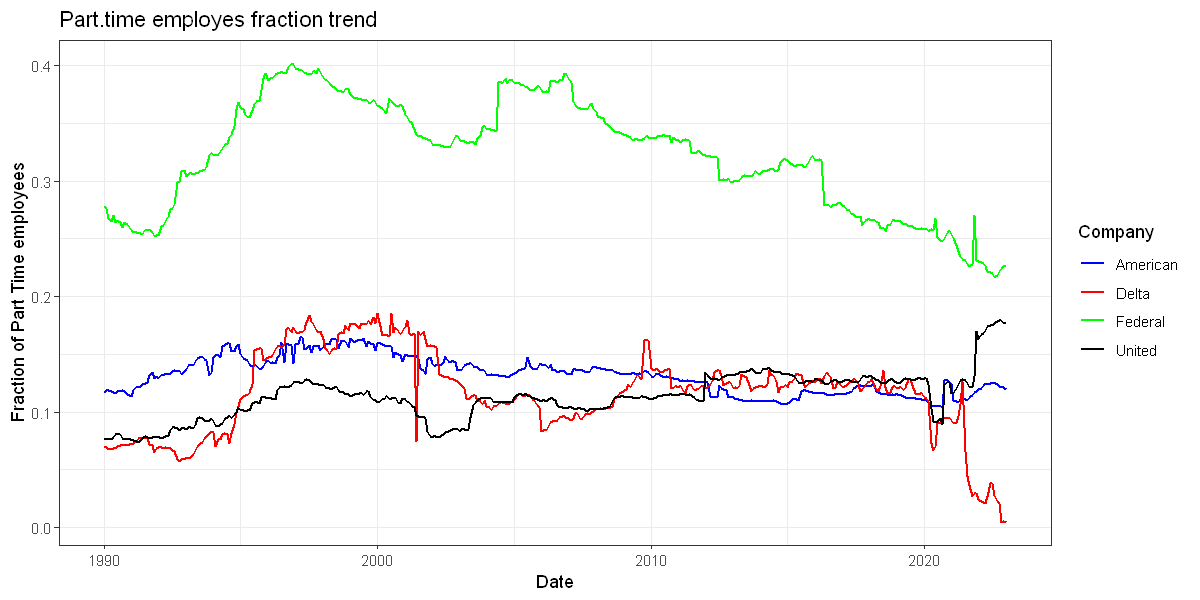

In [6]:
#group by to obtain the sum of PartTime and total worker for each Date and Company 
data_by_Date <- data |> group_by(Date, Company) |> reframe(Total = sum(Total), Part.time = sum(Part.time))

data_by_Date$PT.Fraction <- data_by_Date$Part.time/data_by_Date$Total

ggplot(data_by_Date, aes(x = Date, y = PT.Fraction, color=Company, label=Company)) + 
        geom_line(linewidth = 0.7) +
        labs(title="Part.time employes fraction trend", x = "Date", y="Fraction of Part Time employees") +
        scale_color_manual(values=colorlist1)

6) COVID-19 pandemic influence in the employed workers

Immediately after the first pandemic crisis, the number of workers in Delta, United and American Airline, in this chronological order, suffered a sharp drop, to then rise again and return today to the level of 2019. The only one to have benefited from this situation is Federal Express which has significantly increased the total number of workers, probably thanks to the greater demand of online shipments.

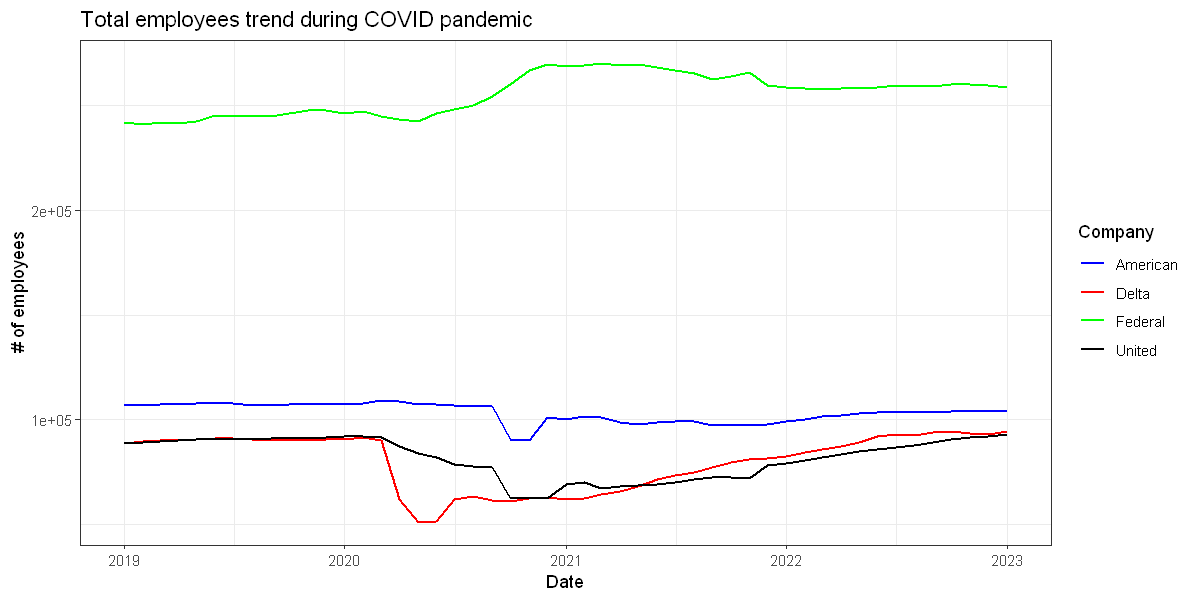

In [7]:
covid_data <- data[data$Year > 2018,]

cov <- ggplot(covid_data, aes(x = Date, y = Total, color = Company, label=Company)) +
            geom_line(linewidth = 0.7) +
            labs(title="Total employees trend during COVID pandemic", x = "Date", y="# of employees") +
            scale_color_manual(values=colorlist1)
    
cov

### Exercise 2 - Data Frames and Tibble

In [29]:
library('nycflights13')
library(dplyr)

In [9]:
#Adding important column to Flight DataFrame 
flights$date <- paste(flights$year, flights$month, flights$day, sep = "-")
flights$date <- as.Date(flights$date)

flights$dayweek <- weekdays(flights$date)

flights$week <- week(flights$date)

#join the dataset to obtain the full name of the airports
fod <- flights |> left_join(airports, by=c("origin"="faa")) |>
                  group_by(name, date, dayweek, week) |> reframe(nflights = n())

1) Plot of the total number of flights departed from each of the three NYC airports as a function of time

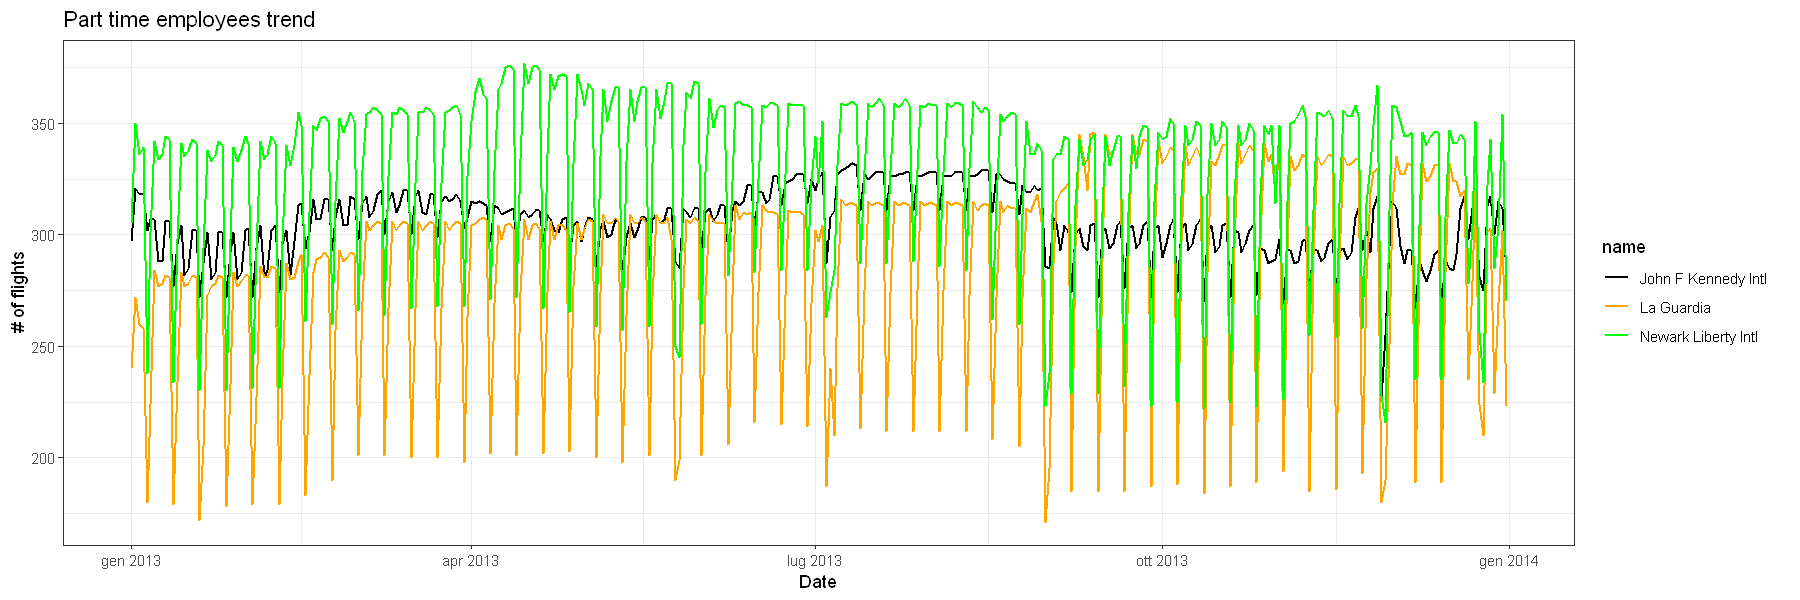

In [10]:
options(repr.plot.width=15, repr.plot.height=5)
colorlist2 = c("black", "orange", "green")
nfly <- ggplot(fod, aes(x = date, y = nflights, color=name, label=name)) + 
               geom_line(linewidth=0.7) +
               labs(title="Part time employees trend", x = "Date", y="# of flights") +
               scale_color_manual(values = colorlist2)
                
nfly

In [11]:
fod <- flights |> group_by(date, dayweek, week) |> reframe(nflights = n())

fod$type_day <- "working_day"
fod[fod$dayweek == 'domenica' | fod$dayweek == 'sabato', ]$type_day <- "week_end"

In [12]:
meanfod <- fod |> group_by(week, type_day) |> reframe(means = mean(nflights), sd = sd(nflights))

Plot of the average number of flights in working/weekend days in each week of the year

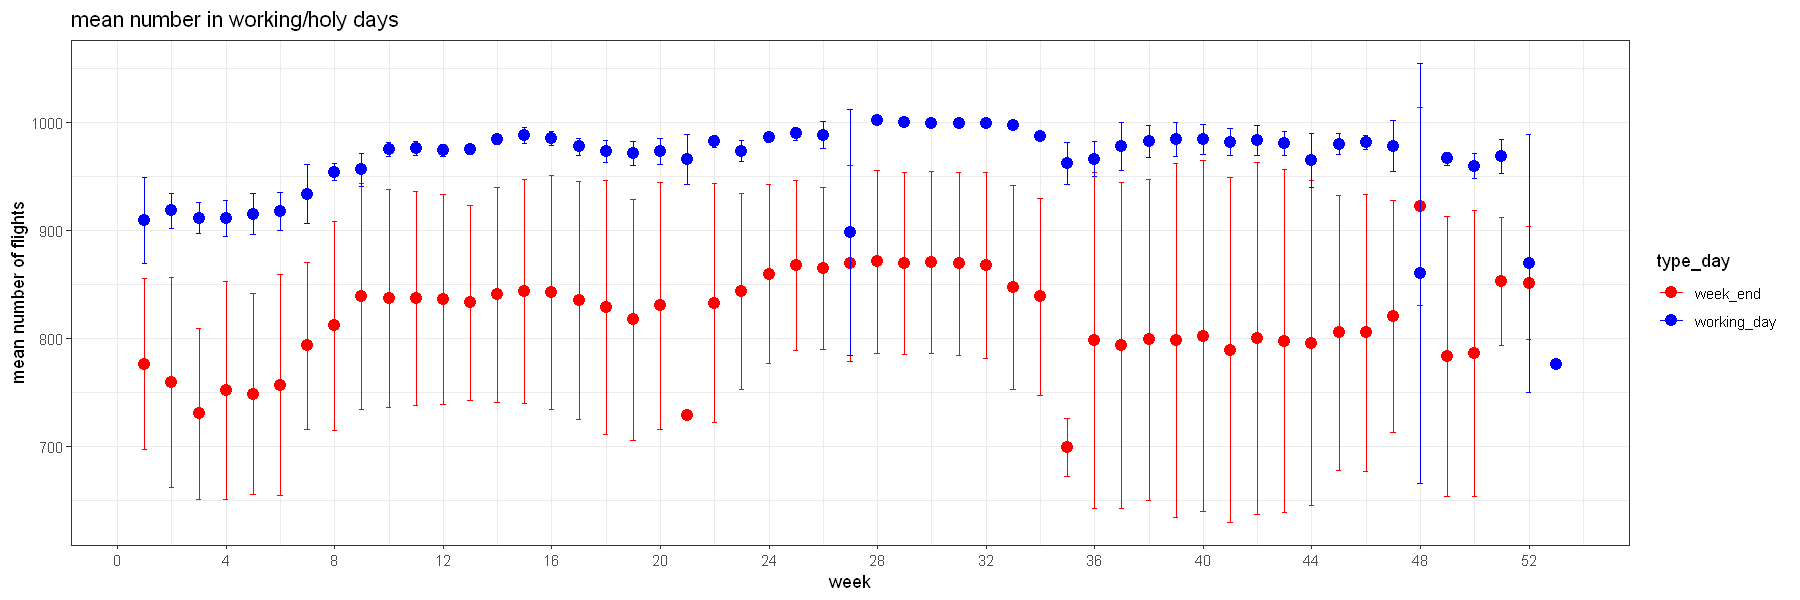

In [13]:
ww <- ggplot(meanfod, aes(x = week, y = means, color=type_day, label=type_day)) + 
            geom_point(size = 3) +
            geom_errorbar(aes(ymin = means - sd, ymax = means + sd, color=type_day), width = 0.2) +
            labs(title="mean number in working/holy days", x = "week", y="mean number of flights") +
            scale_color_manual(values=c("red", "blue")) +
            scale_x_continuous(breaks = seq(0,52,4))
            
ww

2) departure delay for each NYC airport:

Max delay for each day of the year

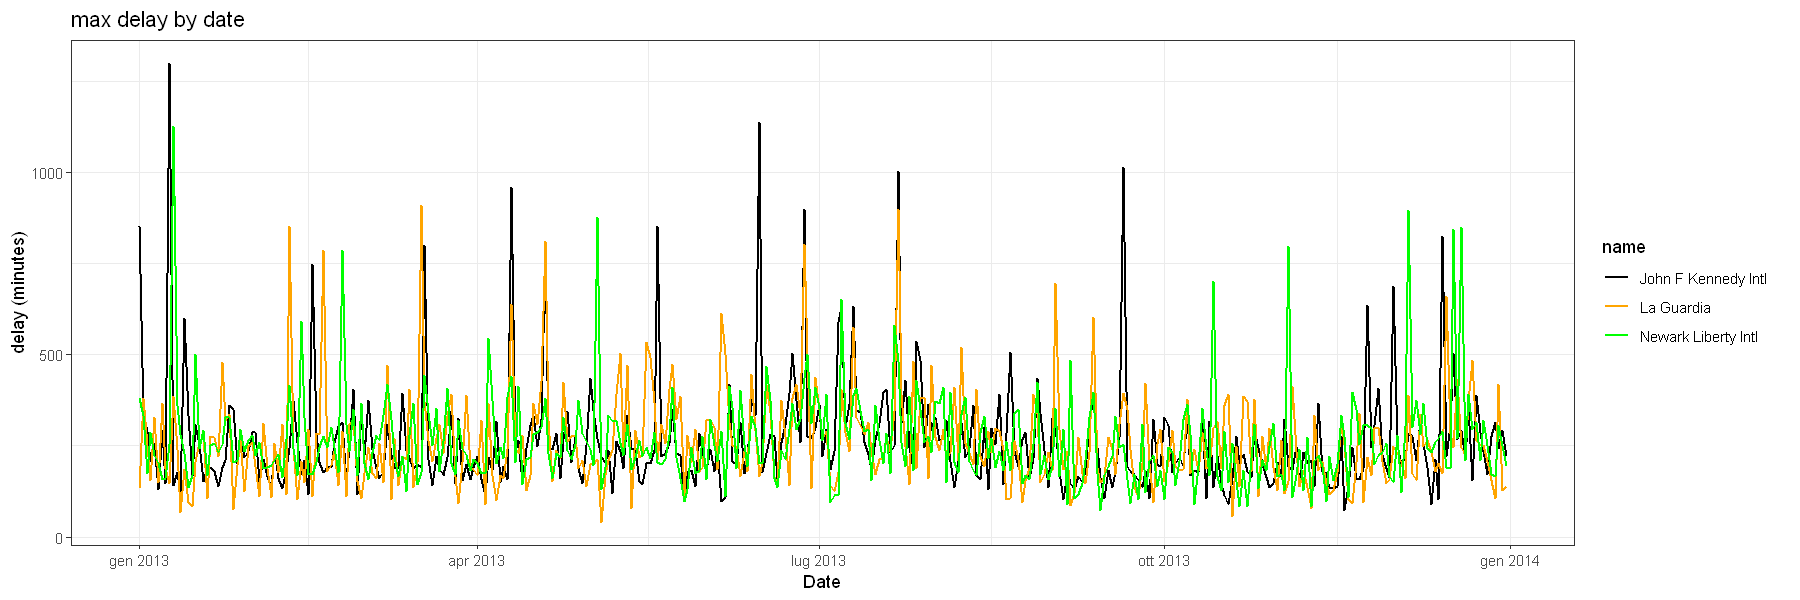

In [14]:
delay <- flights |> left_join(airports, by=c("origin"="faa")) |> 
                    group_by(name, date) |> reframe( maxdelay=max(dep_delay, na.rm=T),
                                                       mindelay=min(dep_delay, na.rm=T), 
                                                       meandelay=mean(dep_delay, na.rm=T) )

maxdelay_plt <- ggplot(delay, aes(x = date, y = maxdelay, color = name, label = name)) + 
            geom_line(linewidth = 0.7) +
            labs(title="max delay by date", x = "Date", y="delay (minutes)") +
            scale_color_manual(values=colorlist2)
maxdelay_plt

Min delay for each day of the year

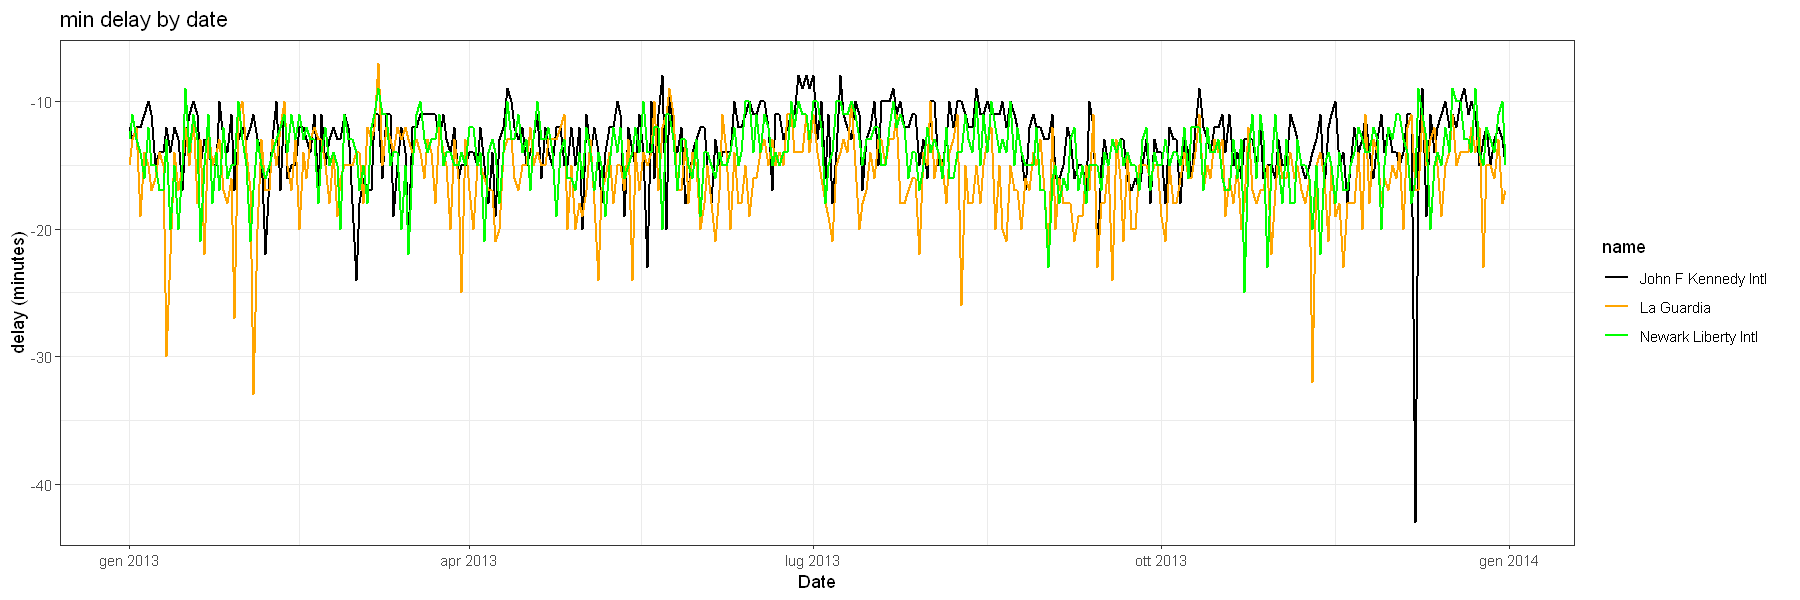

In [15]:
mindelay_plt <- ggplot(delay, aes(x = date, y = mindelay, color = name, label = name)) + 
            geom_line(linewidth = 0.7) +
            labs(title="min delay by date", x = "Date", y="delay (minutes)") +
            scale_color_manual(values=colorlist2)
mindelay_plt

Average delay for each day of the year

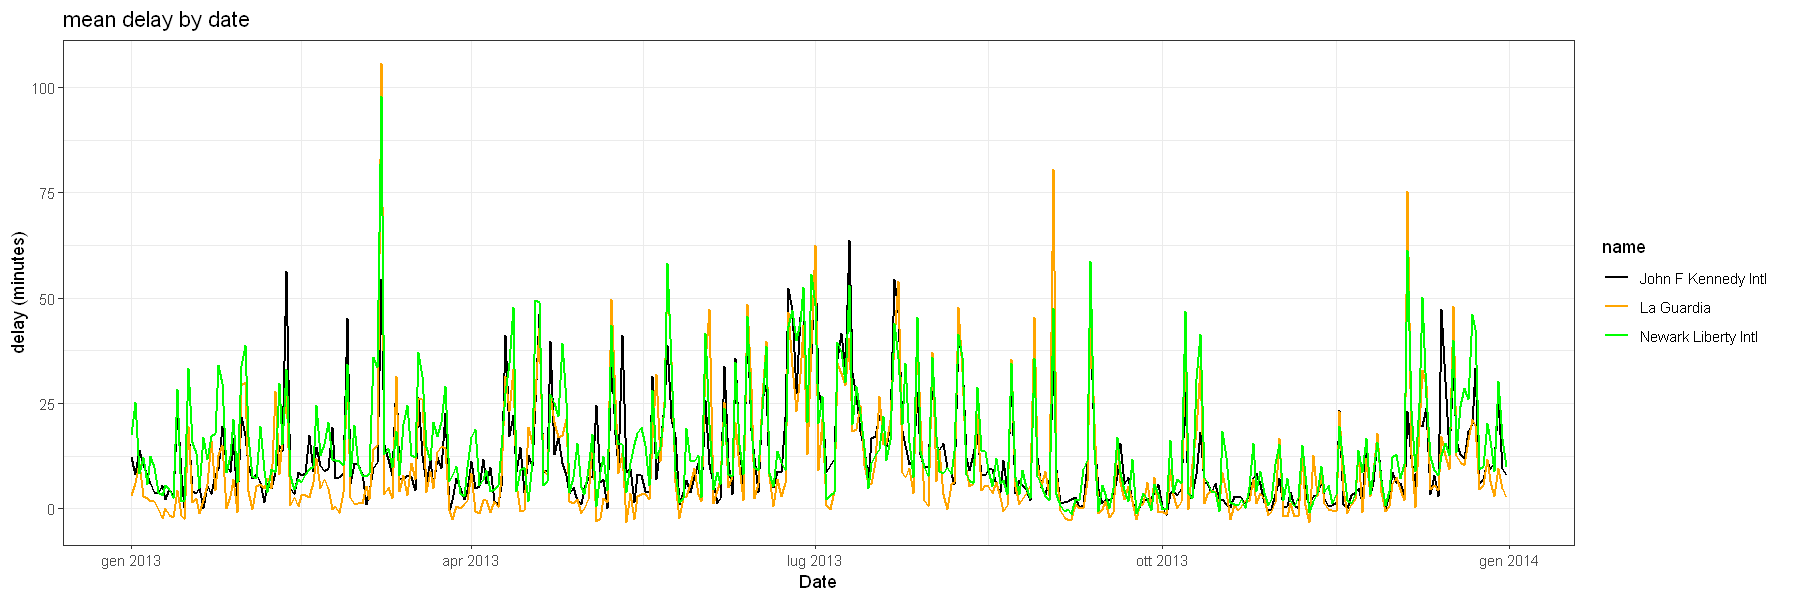

In [16]:
meandelay_plt <- ggplot(delay, aes(x = date, y = meandelay, color = name, label = name)) + 
            geom_line(linewidth = 0.7) +
            labs(title="mean delay by date", x = "Date", y="delay (minutes)") +
            scale_color_manual(values=colorlist2)
meandelay_plt

3) Average speed of each plane as a function of departure day of the year

In [17]:
flights$speed <- flights$distance / flights$air_time *60*1.60934


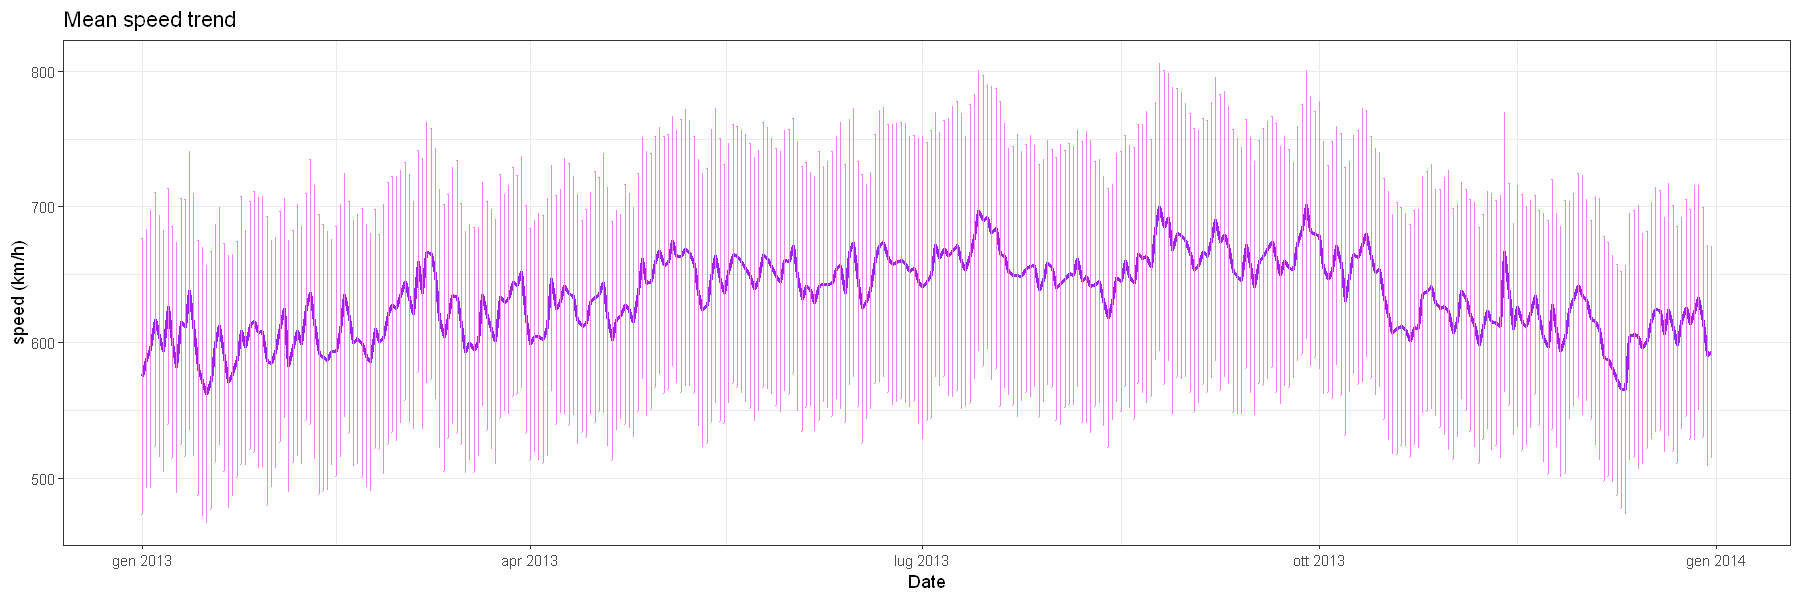

In [18]:
#summarize after group by date to calculate mean and standard deviation of the velocity
speedate <- flights |> group_by(date) |> summarize(meanspeed = mean(speed, na.rm=T), std = sd(speed, na.rm=T))

speed_plt <- ggplot(speedate, aes(x = date, y = meanspeed)) + 
             geom_line(linewidth=1, color="purple") +
             geom_errorbar(aes(ymin = meanspeed - std, ymax = meanspeed + std), width = 0.2, color="violet") +
             labs(title="Mean speed trend", x = "Date", y="speed (km/h)")
speed_plt

4) analysis of flights offered by each airline company:

Airline companies offering the largest two numbers of flights per day and per week

In [19]:
#using left join to merge the database and obtaining the full name of the airlines 
lines_per_day <- flights |> left_join(airlines, by="carrier") |> group_by(date, name) |> reframe(nflights = n())
lines_per_week <- flights |>  left_join(airlines, by="carrier") |> group_by(week, name) |> reframe(nflights = n())

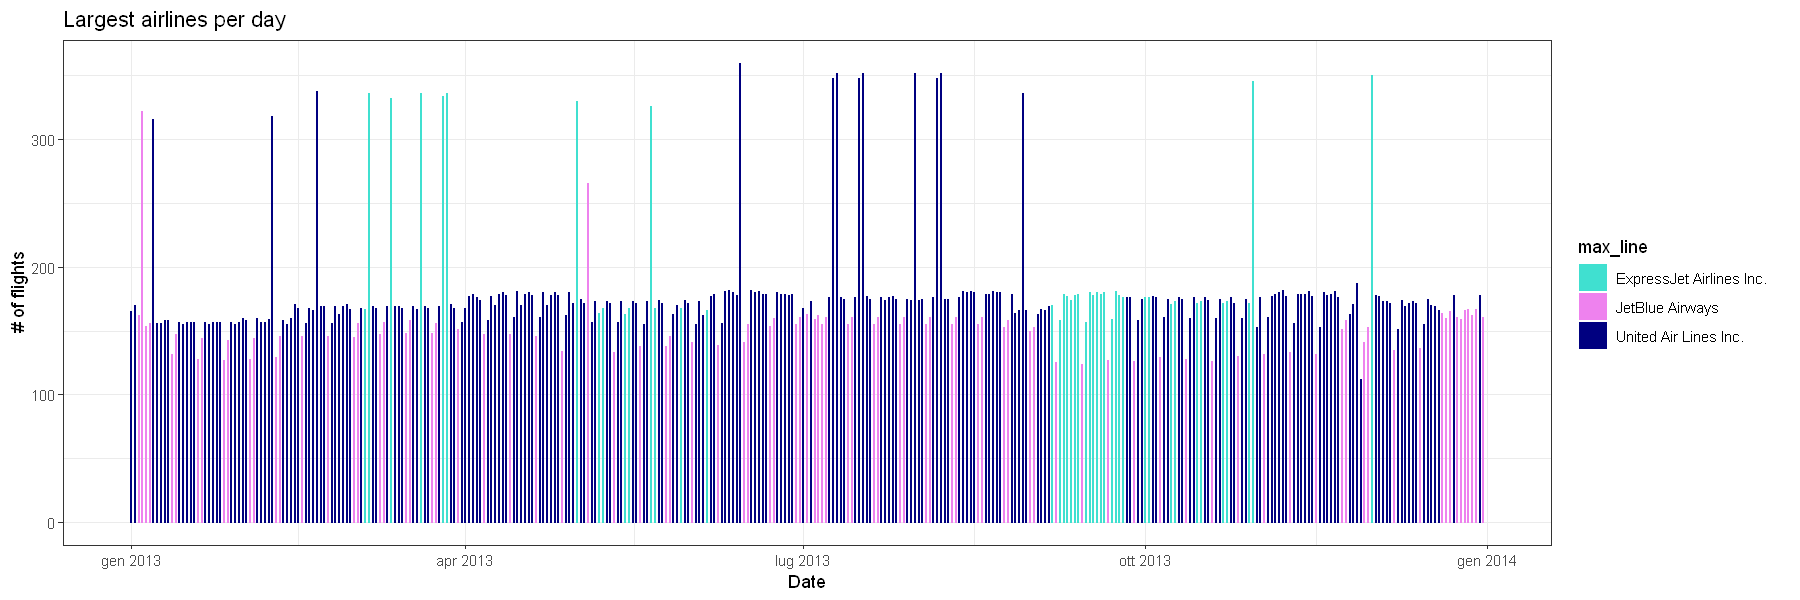

In [25]:
#per day
max_per_day <- lines_per_day |> group_by(date) |> reframe(maxn = sort(nflights, decreasing=T)[1], 
                                                          max_line = name[which.max(nflights)],
                                                          maxn2 = sort(nflights, decreasing=T)[2],
                                                          max_line2 = name[which(nflights==sort(nflights, decreasing=T)[2])])

colorlist3 <- c("turquoise", "violet", "navy")

mpd_plot <- ggplot(max_per_day, aes(x = date, y = maxn, color = max_line, label = max_line, fill = max_line)) + 
            geom_col(width = 0.2) +
            labs(title="Largest airlines per day", x = "Date", y="# of flights") +
            scale_color_manual(values=colorlist3) + scale_fill_manual(values=colorlist3)
mpd_plot

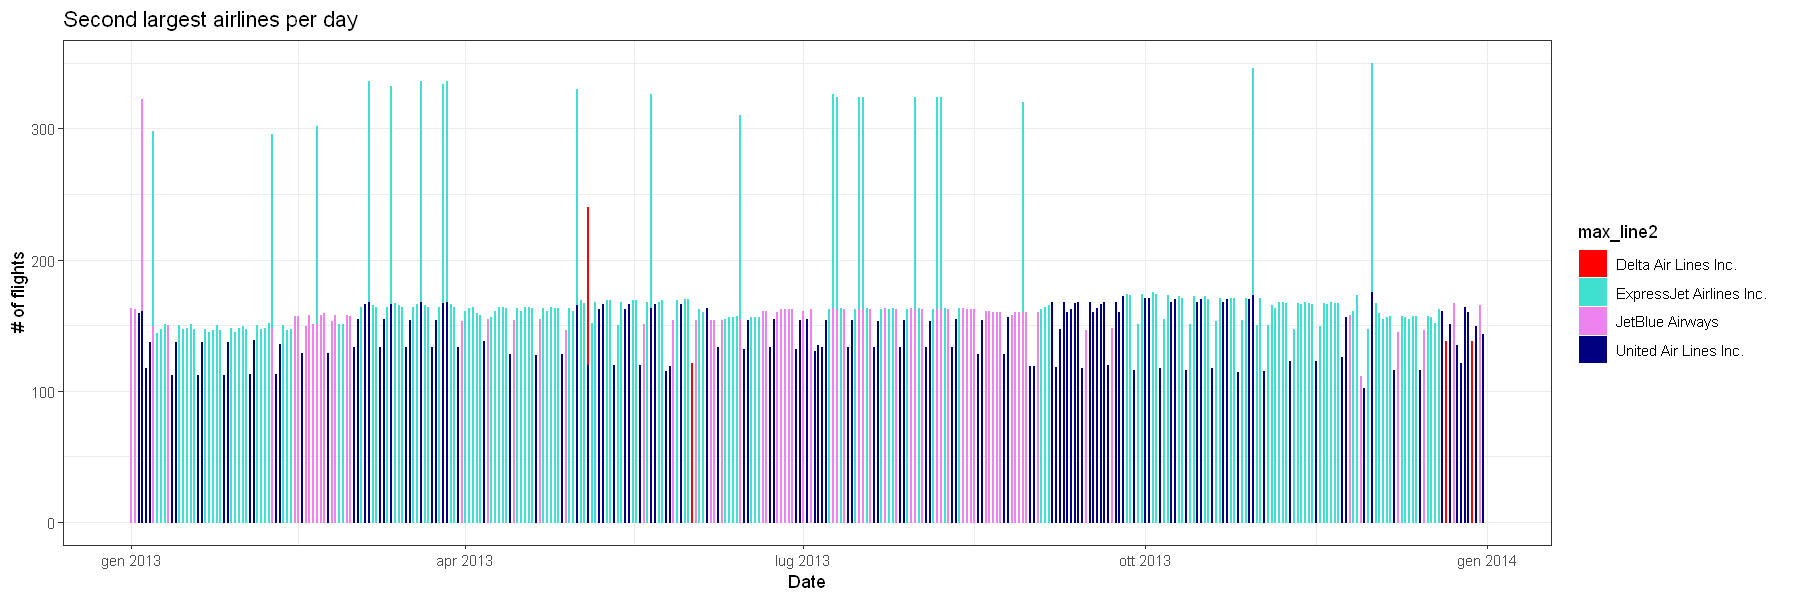

In [21]:
mpd2_plot <- ggplot(max_per_day, aes(x = date, y = maxn2, color = max_line2, label = max_line2, fill = max_line2)) + 
            geom_col(width = 0.2) +
            labs(title="Second largest airlines per day", x = "Date", y="# of flights") +
            scale_color_manual(values=c("red", colorlist3)) + scale_fill_manual(values=c("red", colorlist3))
mpd2_plot

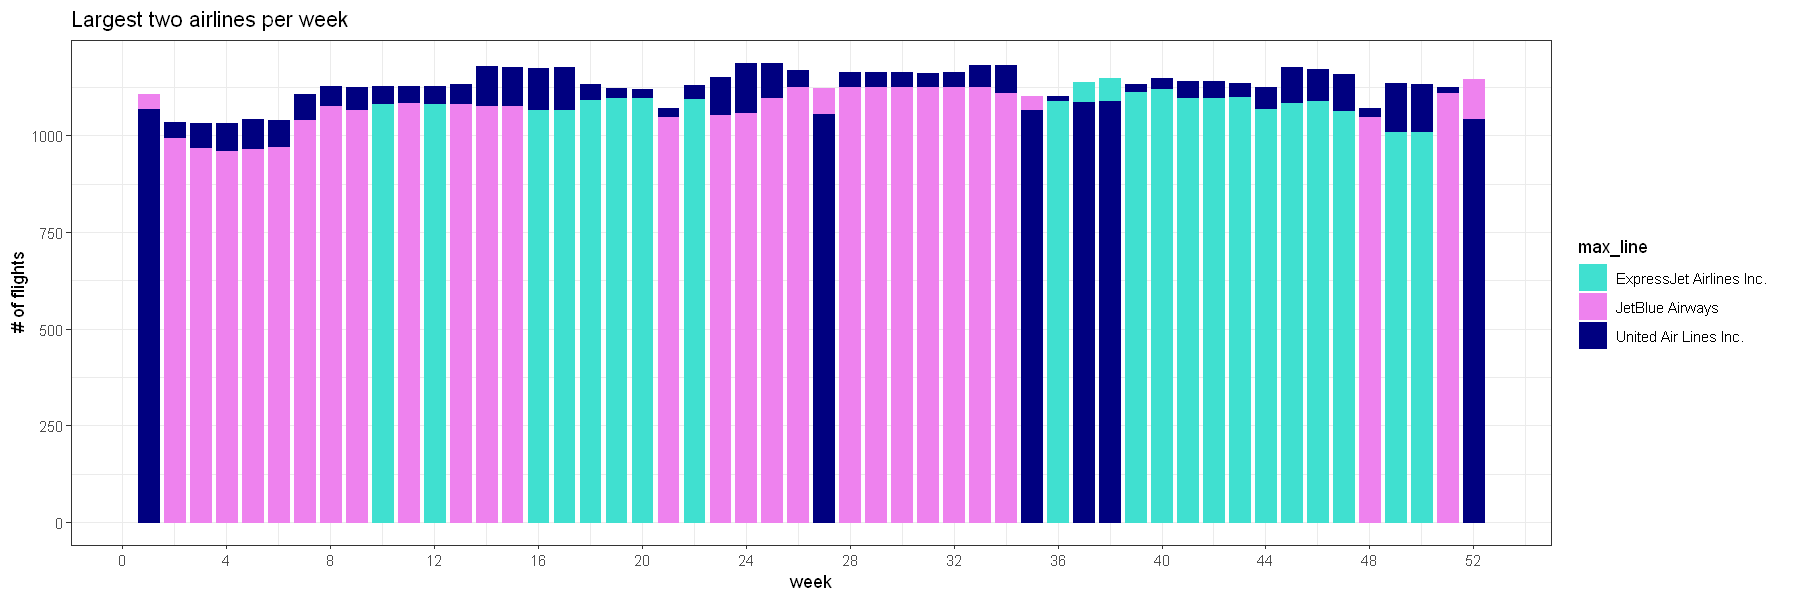

In [22]:
#and per week
max_per_week <- lines_per_week |> group_by(week) |> reframe(maxn = sort(nflights, decreasing=T)[1], 
                                                          max_line = name[which.max(nflights)],
                                                          maxn2 = sort(nflights, decreasing=T)[2],
                                                          max_line2 = name[which(nflights==sort(nflights, decreasing=T)[2])])

max_per_week <- head(max_per_week, - 1) 

mpw_plot <- ggplot(max_per_week, aes(x = week, y = maxn, color = max_line, label = max_line, fill = max_line)) + 
            geom_col(width = 0.8) +
            geom_col( aes(x = week, y = maxn2, color = max_line2, fill = max_line2, label = max_line2), width = 0.8 ) +
            labs(title="Largest two airlines per week", x = "week", y="# of flights") +
            scale_color_manual(values=colorlist3) + scale_fill_manual(values= colorlist3) +
            scale_x_continuous(breaks = seq(0,52,4))
mpw_plot

The airline company offering the smallest number of flight per month

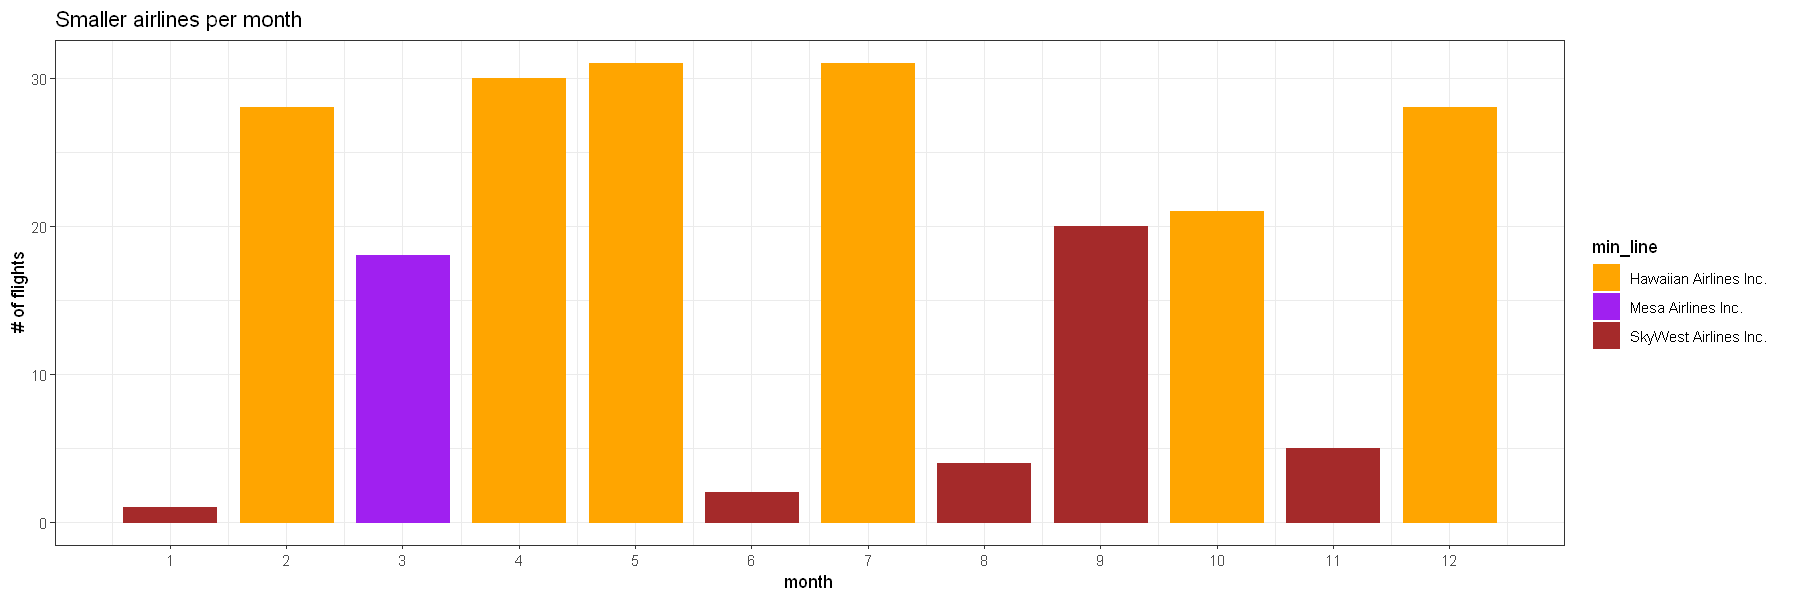

In [23]:
lines_per_month <- flights |> left_join(airlines, by="carrier") |> group_by(month, name) |> reframe(nflights = n())

min_per_month <- lines_per_month |> group_by(month) |> reframe( min = min(nflights),
                                                                min_line = name[which.min(nflights)] )
                                                               

mpm_plot <- ggplot(min_per_month, aes(x = month, y = min, color = min_line, label = min_line, fill = min_line)) + 
            geom_col(width = 0.8) +
            labs(title="Smaller airlines per month", x = "month", y="# of flights") +
            scale_color_manual(values=c("orange","purple","brown")) + scale_fill_manual(values= c("orange","purple","brown")) +
            scale_x_continuous(breaks = c(0:13))
mpm_plot

The airline company offering the longest distance flight per month

In [28]:
dist_per_month <- flights |> left_join(airlines, by="carrier") |>
                             group_by(month) |> reframe(max_distance = max(distance),
                                                        line = name[which.max(distance)],
                                                        speed = speed[which.max(distance)] )
dist_per_month

month,max_distance,line,speed
<int>,<dbl>,<chr>,<dbl>
1,4983,Hawaiian Airlines Inc.,730.1373
2,4983,Hawaiian Airlines Inc.,776.0653
3,4983,Hawaiian Airlines Inc.,779.8387
4,4983,Hawaiian Airlines Inc.,760.1271
5,4983,Hawaiian Airlines Inc.,792.6861
6,4983,Hawaiian Airlines Inc.,790.0829
7,4983,Hawaiian Airlines Inc.,818.3001
8,4983,Hawaiian Airlines Inc.,768.6270
9,4983,Hawaiian Airlines Inc.,792.6861
